In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Importing the necessary libraries

In [79]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


This shows the first five data of the dataset

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# EDA

This shows the information in our dataset

In [81]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


This shows that the distribution of information in our dataset

In [82]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We do not have any mmissing value in our dataset

In [105]:
data.shape

(4177, 9)

We have 4178 columns in our dataset and 9 rows

In [84]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

These are the various columns present in our dataset

In [132]:
print(data['Rings'])

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4177, dtype: int64


This is the output column was trying to understand the various category in it

# Visualization

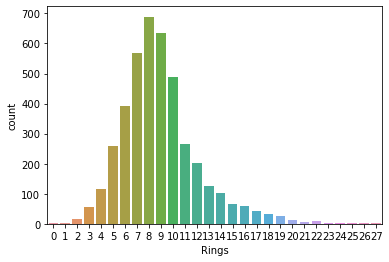

In [133]:
sns.countplot(data['Rings'])
warnings.filterwarnings("ignore")

These are the various count that we have in the Sex category

<Figure size 1008x432 with 0 Axes>

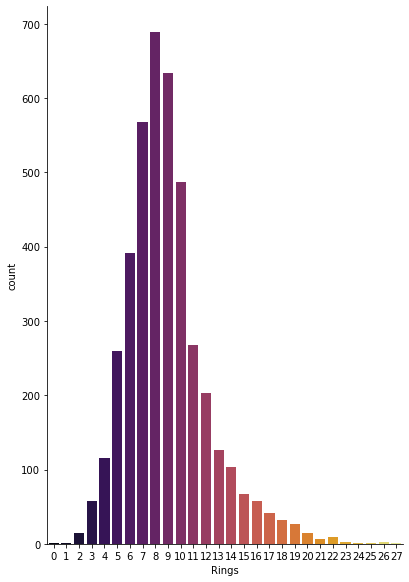

In [134]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'Rings', data = data, kind = "count",
               height = 8, aspect = .7, palette = "inferno");
warnings.filterwarnings("ignore")

These are the various count that we have in the Sex category

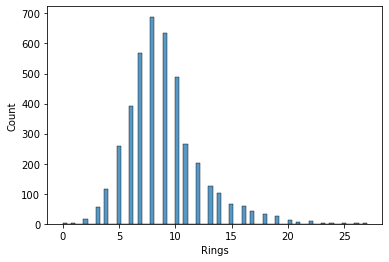

In [135]:
sns.histplot(data['Rings'])
warnings.filterwarnings("ignore")

These are the various count that we have in the Sex category

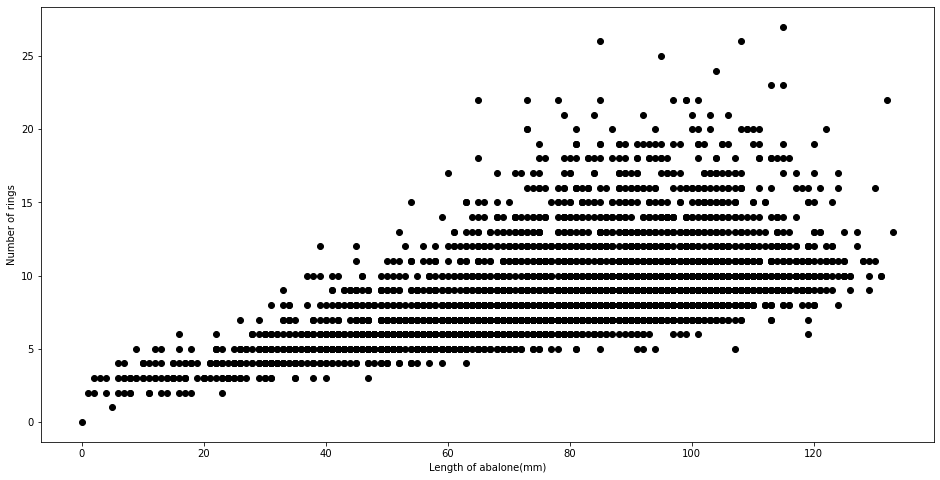

In [139]:
plt.figure(figsize=(16,8))
plt.scatter(data['Length'],data['Rings'], c='black')
plt.xlabel('Length of abalone(mm)')
plt.ylabel('Number of rings')
plt.show()

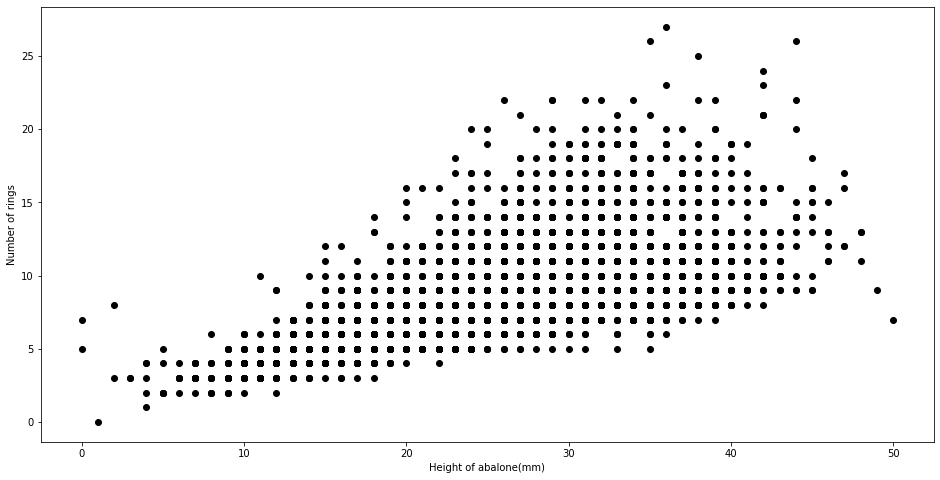

In [140]:
plt.figure(figsize=(16,8))
plt.scatter(data['Height'],data['Rings'], c='black')
plt.xlabel('Height of abalone(mm)')
plt.ylabel('Number of rings')
plt.show()

In [147]:
encoded_data = pd.get_dummies(data)
encoded_data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6


In [148]:
encoded_data.shape

(4177, 9)

# Split Dataset

With the help of label encoder have encoded the sex colum

This shows the correlation

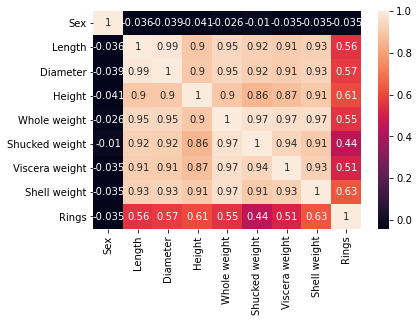

In [150]:
sns.heatmap(corr_matrix, annot = True)
warnings.filterwarnings("ignore")

This shows the correlation.

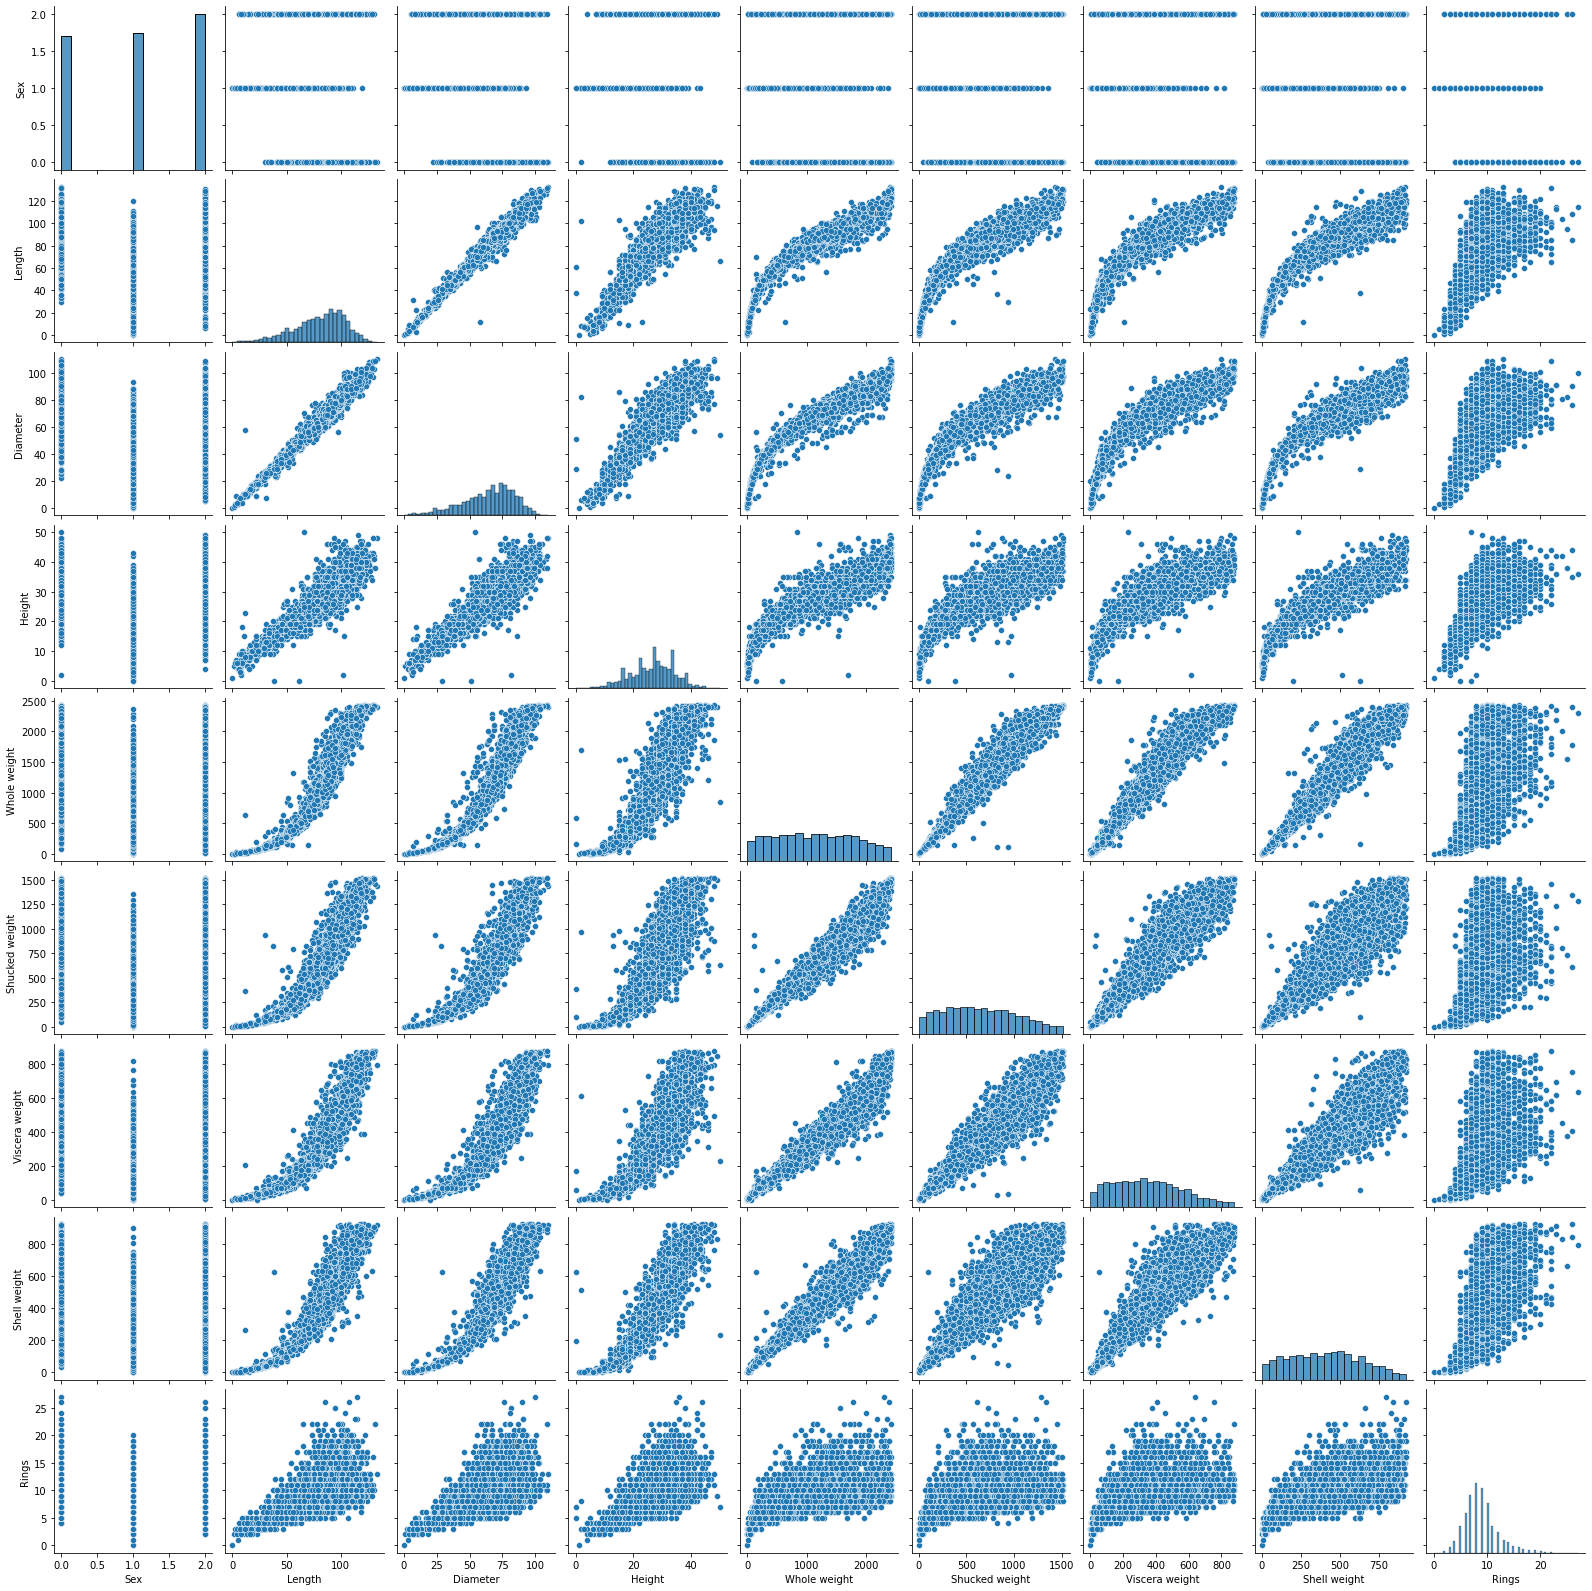

In [92]:
sns.pairplot(data)

Pairplot to understand the relation between various features.

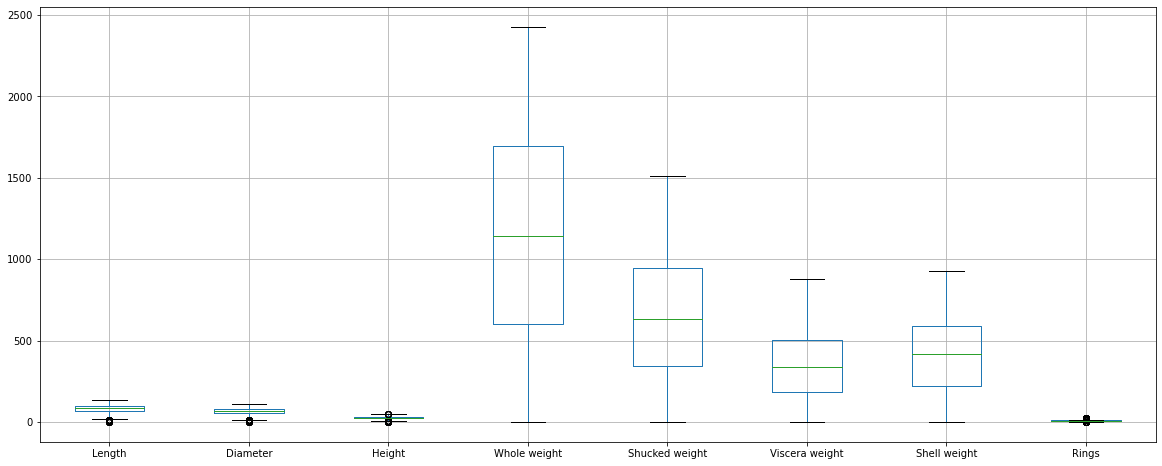

In [93]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust()
plt.show()

To check if we have any kind of an outlier.

In [152]:
x = data.drop(["Rings"], axis =1)
y = data["Rings"]

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

# Decision Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 0, max_depth= 5)
dt.fit(x_train , y_train)
dt.score(x_train, y_train)

0.3198768388641806

In [155]:
predictions = dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.25996810207336524

# Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.3277454669859733

In [157]:
predictions = rf.predict(x_test)
rf.score(x_test, y_test)
accuracy_score(y_test, predictions)

0.2607655502392344

# K Nearest Neighbors

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
accuracy_score(y_test, knn.predict(x_test))

0.23365231259968103

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train, y_train)
accuracy_score(y_test, svm.predict(x_test))